In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### Ratings

In [2]:
ratings_df = pd.read_csv(os.path.join("./ratings.csv"),encoding='utf-8')


In [3]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_df.drop('timestamp',inplace=True,axis=1)


In [6]:
ratings_df.isna().sum()


userId     0
movieId    0
rating     0
dtype: int64

In [7]:
ratings_df.isna().sum()


userId     0
movieId    0
rating     0
dtype: int64

In [8]:
import seaborn as sns


In [9]:
ratings_count = ratings_df["rating"].value_counts().sort_index()
ratings_count

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

4점 이상이 50%가 넘으므로 y를 4 이상 or not

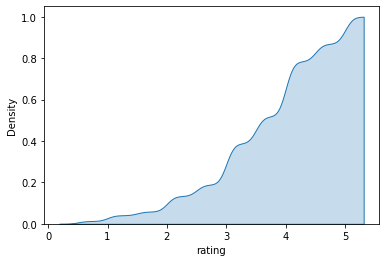

In [10]:
sns.kdeplot(ratings_df['rating'], cumulative=True, shade= True)


### Movies

In [11]:
movies_df = pd.read_csv(os.path.join("./movies.csv"),encoding='utf-8')
movies_df = movies_df.set_index("movieId")

In [12]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [13]:
movies_df.describe()


,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [14]:
movies_df.head()


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [15]:
movies_df.shape


(9742, 2)

In [16]:
movies_df.isna().sum()


title     0
genres    0
dtype: int64

### movies-genre

In [17]:
dummy_genre_df =  movies_df['genres'].str.get_dummies(sep='|')


In [18]:
dummy_genre_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


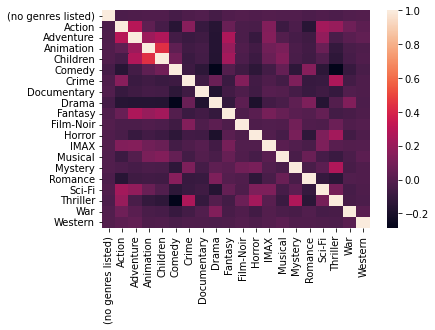

In [19]:
sns.heatmap(dummy_genre_df.corr())


### movies_year

In [20]:
#연도 추출
movies_df['year'] = movies_df["title"].str.extract('(\(\d\d\d\d\))')


In [21]:
movies_df['year'] = movies_df['year'].astype('str')


In [22]:
movies_df['year']=  movies_df['year'].map(lambda x : x.replace("(","").replace(")",""))


In [23]:
movies_df['year'] = movies_df['year'].astype("float32")

In [24]:
movies_df['year'] = movies_df['year'].dropna(axis=0, inplace=False)

In [38]:
movies_df.dropna(axis=0, inplace=True)

In [39]:
movies_df.isna().sum()

title     0
genres    0
year      0
dtype: int64

In [41]:
movies_df['year'] = movies_df['year'].astype("int64")

In [42]:
#연도가 없으면 지워버림
movies_df[movies_df['year'] ==0].index

Int64Index([], dtype='int64', name='movieId')

In [43]:
movies_df.drop(movies_df[movies_df['year'] ==0].index ,inplace=True, axis = 0)


In [44]:
movies_df.drop('title',axis=1,inplace=True)


In [45]:
#연도 구간 나누기
print(movies_df['year'].min())
print(movies_df['year'].max())

1902
2018


In [46]:
bins = list(range(1900,2021,20))
bins

[1900, 1920, 1940, 1960, 1980, 2000, 2020]

In [47]:
labels = [x for x in range(len(bins)-1)]
labels

[0, 1, 2, 3, 4, 5]

In [48]:
movies_df['year_level'] = pd.cut(movies_df['year'], bins, right = False, labels = labels)
movies_df.drop('year',inplace = True, axis = 1)

## FM훈련모델 만들기

In [49]:
ratings_df.groupby('movieId').size()


movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64

In [50]:
len(ratings_df['movieId'].unique())


9724

In [51]:
#리뷰 숫자가 기준치 이상인 영화만 사용
threshold = 10
over_threshold = ratings_df.groupby('movieId').size() >= threshold
ratings_df['over_threshold'] = ratings_df['movieId'].map(lambda x: over_threshold[x])
ratings_df= ratings_df[ratings_df["over_threshold"]==True]
ratings_df.drop("over_threshold", axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
len(ratings_df['movieId'].unique())


2269

In [53]:
#shuffle
print("원본크기 :",  ratings_df.shape)
random_idx = np.random.permutation(len(ratings_df))
shuffled_df = ratings_df.iloc[random_idx]

원본크기 : (81116, 3)


**TRAINSET**

In [54]:
concat_df = pd.concat([
    pd.get_dummies(shuffled_df['userId'], prefix = "user"),
    pd.get_dummies(shuffled_df['movieId'] , prefix = "movie"),
    shuffled_df['movieId'].apply(lambda x: dummy_genre_df.loc[x]),
    shuffled_df['movieId'].apply(lambda x: movies_df.loc[x]["year_level"]).rename('year_level'),
],axis=1)

In [55]:
concat_df

,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year_level
4470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
77225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
45781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
73812,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,4
97822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
9235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,4
42103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
15234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [56]:
target_df = ratings_df.loc[concat_df.index]['rating']
target_df = target_df.apply(lambda x:1 if x>=4 else 0)
target_df.value_counts()

1    41423
0    39693
Name: rating, dtype: int64

In [57]:
X_train,X_test,y_train,y_test = train_test_split(concat_df,target_df, test_size = 0.1)


In [58]:
n = X_train.shape[0]
n_factor = 10
p =  X_train.shape[1]
batch_size= 32
epochs = 10
n_steps = len(X_train)//batch_size
optimizer = keras.optimizers.Adam(lr = 0.01)
loss_fn = keras.losses.binary_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.BinaryAccuracy()]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [59]:
class FM(keras.Model):
    def __init__(self,n_factor=8,**kwargs):
        super().__init__(**kwargs)
        
        self.w_0 =  tf.Variable([0.0])
        self.w = tf.Variable(tf.zeros(shape = [p]))
        self.v = tf.Variable(tf.random.normal(shape = (p,n_factor)))
        
    def call(self, inputs):
        
        degree_1 = tf.reduce_sum(tf.multiply(self.w,inputs),axis= 1)
        
        degree_2 = 0.5 * tf.reduce_sum(
          tf.math.pow(tf.matmul(inputs,self.v),2)
            -tf.matmul(tf.math.pow(inputs,2),tf.math.pow(self.v,2))
            ,1
            ,keepdims=False
        )
                             
        predict = tf.math.sigmoid(self.w_0 + degree_1 + degree_2)
                             
        return predict
        

In [60]:
model = FM(n_factor = n_factor)


In [61]:
def print_status_bar(iteration, total, loss, metrics = None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}" 
                          for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print(f"\r{iteration}/{total}  " + metrics ,
          end = end)

In [62]:
train_data = tf.data.Dataset.from_tensor_slices(
(tf.cast(X_train,tf.float32), tf.cast(y_train,tf.float32))).shuffle(500).batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices(
(tf.cast(X_test,tf.float32), tf.cast(y_test, tf.float32))).shuffle(200).batch(batch_size)

for epoch in range(epochs):
    
    print(f"에포크 : {epoch}/{epochs}")

    for step,(X_batch,y_batch) in enumerate(train_data):
        #train, test data
        with tf.GradientTape() as tape:
            predict = model(X_batch)
            loss = loss_fn(y_batch,predict)
        gradients = tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        
        mean_loss(loss)

        for metric in metrics:
            metric(y_batch,predict)
        

    test_acc = keras.metrics.BinaryAccuracy()
    for x,y in test_data:
        prediction = model(x)
        test_acc.update_state(y,prediction)
    
        print_status_bar(step*batch_size,len(y_train),mean_loss,metrics = metrics)        
    print_status_bar(n_steps*batch_size,n_steps*batch_size,mean_loss,metrics = metrics)
    print("검증 정확도: ",test_acc.result().numpy())
    for metric in [mean_loss] + metrics:
        metric.reset_states()
   

에포크 : 0/10
72992/72992  mean: 1.4933 - binary_accuracy: 0.6023
검증 정확도:  0.652436
에포크 : 1/10
72992/72992  mean: 0.5906 - binary_accuracy: 0.7094
검증 정확도:  0.6753199
에포크 : 2/10
72992/72992  mean: 0.5266 - binary_accuracy: 0.7412
검증 정확도:  0.67015254
에포크 : 3/10
72992/72992  mean: 0.4874 - binary_accuracy: 0.7650
검증 정확도:  0.6685532
에포크 : 4/10
72992/72992  mean: 0.4542 - binary_accuracy: 0.7859
검증 정확도:  0.6652313
에포크 : 5/10
72992/72992  mean: 0.4281 - binary_accuracy: 0.8003
검증 정확도:  0.6615403
에포크 : 6/10
72992/72992  mean: 0.4095 - binary_accuracy: 0.8127
검증 정확도:  0.6616634
에포크 : 7/10
72992/72992  mean: 0.3940 - binary_accuracy: 0.8215
검증 정확도:  0.65784943
에포크 : 8/10
72992/72992  mean: 0.3812 - binary_accuracy: 0.8282
검증 정확도:  0.65452754
에포크 : 9/10
72992/72992  mean: 0.3711 - binary_accuracy: 0.8345
검증 정확도:  0.65649605
